***Load and manipulate with PIL***

PNG (854, 480) P


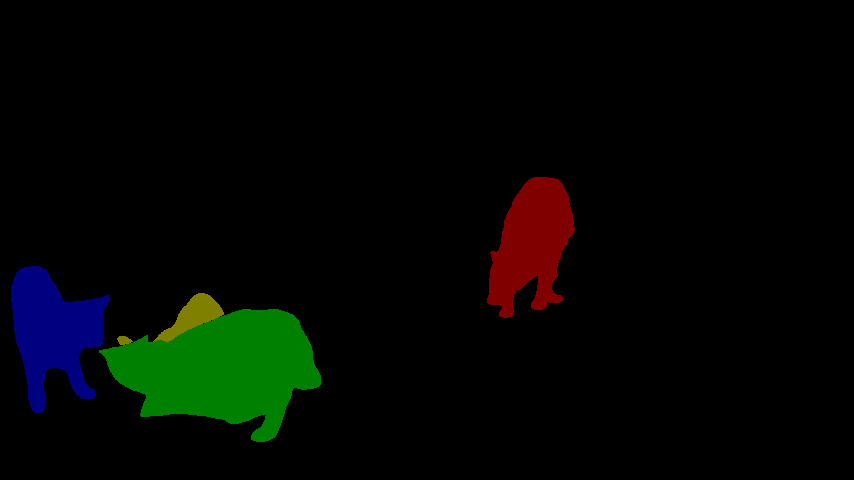

In [5]:
from PIL import Image
file_path = "/content/sample_data/Imgur.png"
img = Image.open(file_path)
print(img.format, img.size, img.mode)
img

(480, 854)


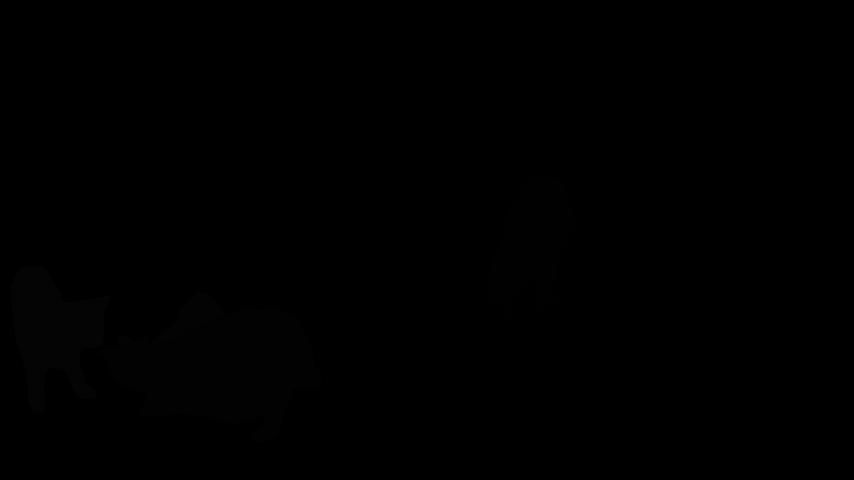

In [8]:
from numpy import asarray
data = asarray(img)
print(data.shape)
Image.fromarray(data)

In [9]:
Image.fromarray(data).save("test.png")

In [14]:
Image.fromarray(data).convert(mode="CMKY").save("grey.png")

ValueError: conversion from L to CMKY not supported

**Resize**

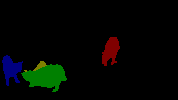

In [24]:
#with aspect ratio
img = Image.open(file_path)
img.thumbnail((500, 100))
display(img)

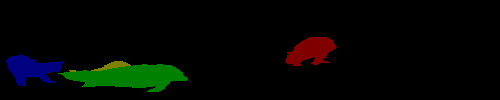

In [26]:
#without aspect
img = Image.open(file_path)
img = img.resize((500, 100))
display(img)

**rotate, flip**

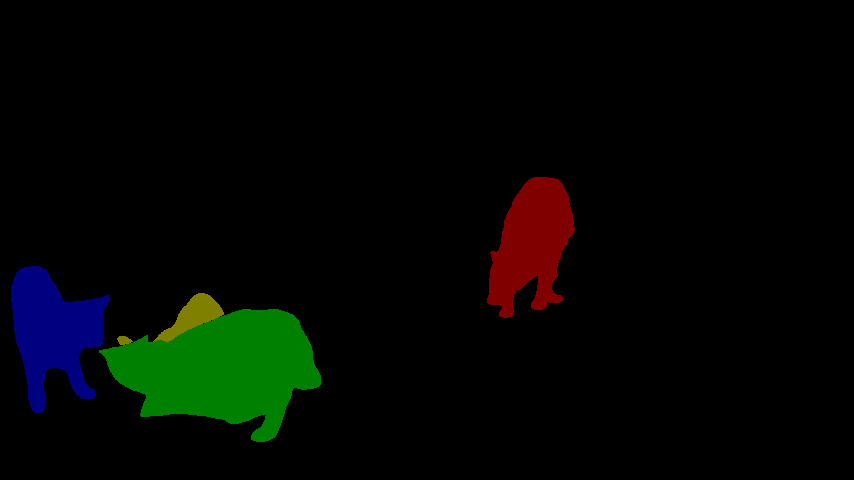

In [28]:
img = Image.open(file_path)
img.transpose(method=Image.FLIP_LEFT_RIGHT)
display(img)

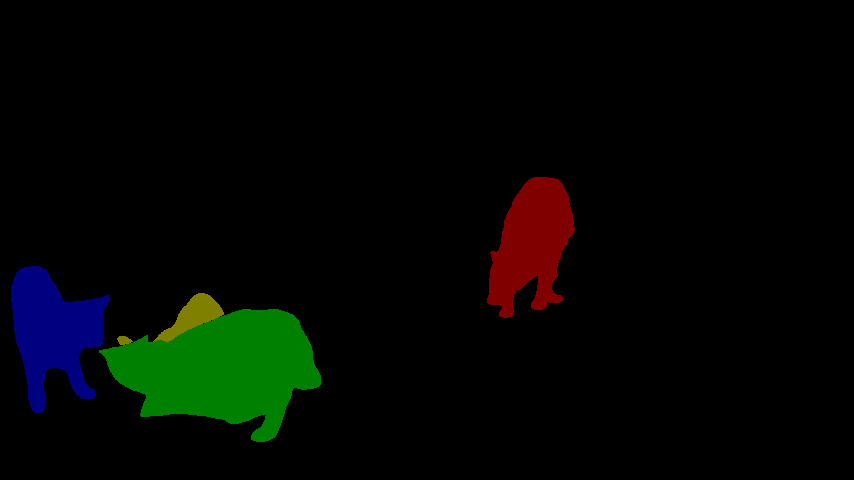

In [29]:
img = Image.open(file_path)
img.transpose(method=Image.FLIP_TOP_BOTTOM)
display(img)

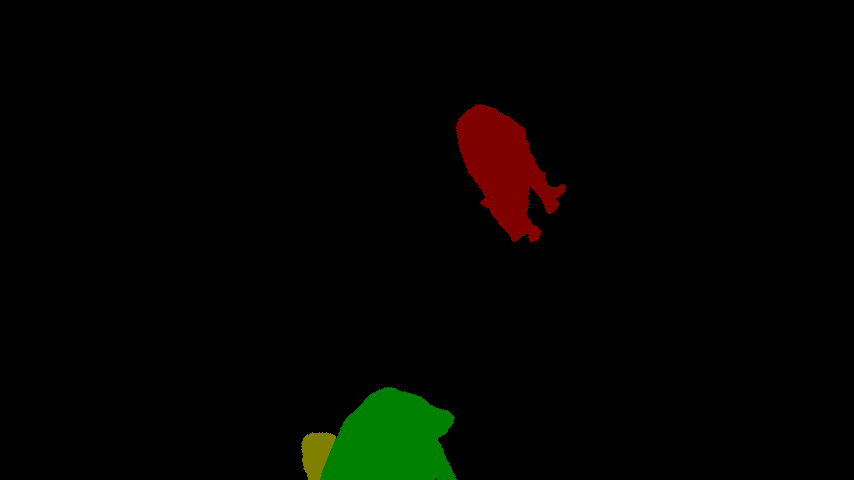

In [31]:
img = Image.open(file_path)
img = img.rotate(45)
display(img)

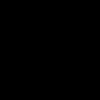

In [33]:
img = Image.open(file_path)
img = img.crop((0, 0, 100, 100))
display(img)

**Normalize pixels**

In [38]:
pixels = asarray(Image.open(file_path))
print (pixels.min(), pixels.max())
pixels = pixels.astype('float32')
pixels = pixels/255.0
print (pixels.min(), pixels.max())

0 4
0.0 0.015686275


**Centering**

In [42]:
#global centering
pixels = asarray(img)
print(pixels.mean(), pixels.std())
pixels = pixels.astype('float32')
pixels = (pixels - pixels.mean())
print(pixels.mean(), pixels.std())

#local centering
pixels = asarray(img)
print(pixels.mean(axis=(0, 1), dtype='float64'), pixels.std(axis=(0, 1), dtype='float64'))
pixels = pixels.astype('float32')
pixels = (pixels - pixels.mean(axis=(0, 1), dtype='float64'))
print(pixels.mean(axis=(0, 1), dtype='float64'), pixels.std(axis=(0, 1), dtype='float64'))

0.0007645681223308995 0.002781089747802684
-5.4781544e-11 0.0027810899
0.0007645681223308995 0.002781089747802684
-6.274874452981374e-12 0.002781089866788731


***Standardization***

In [43]:
#global standardize
pixels = asarray(img)
print(pixels.mean(), pixels.std())
pixels = pixels.astype('float32')
pixels = (pixels - pixels.mean())/pixels.std()
print(pixels.mean(), pixels.std())

#local standardize
pixels = asarray(img)
print(pixels.mean(axis=(0, 1), dtype='float64'), pixels.std(axis=(0, 1), dtype='float64'))
pixels = pixels.astype('float32')
pixels = (pixels - pixels.mean(axis=(0, 1), dtype='float64'))/pixels.std(axis=(0, 1), dtype='float64')
print(pixels.mean(axis=(0, 1), dtype='float64'), pixels.std(axis=(0, 1), dtype='float64'))

0.0007645681223308995 0.002781089747802684
2.5684438e-08 1.0
0.0007645681223308995 0.002781089747802684
-6.063411609908736e-11 0.999999994361341


***Positive standardize***

In [45]:
pixels = asarray(img)
print(pixels.mean(), pixels.std())
pixels = pixels.astype('float32')
pixels = (pixels - pixels.mean())/pixels.std()
pixels = pixels.clip(-1, 1)
pixels = pixels+1.0/2.0
print(pixels.mean(), pixels.std(), pixels.min(), pixels.max())

0.0007645681223308995 0.002781089747802684
0.33380818 0.3560817 0.22508323 1.5


***Keras***

<class 'PIL.Image.Image'>
None
RGB
(854, 480)


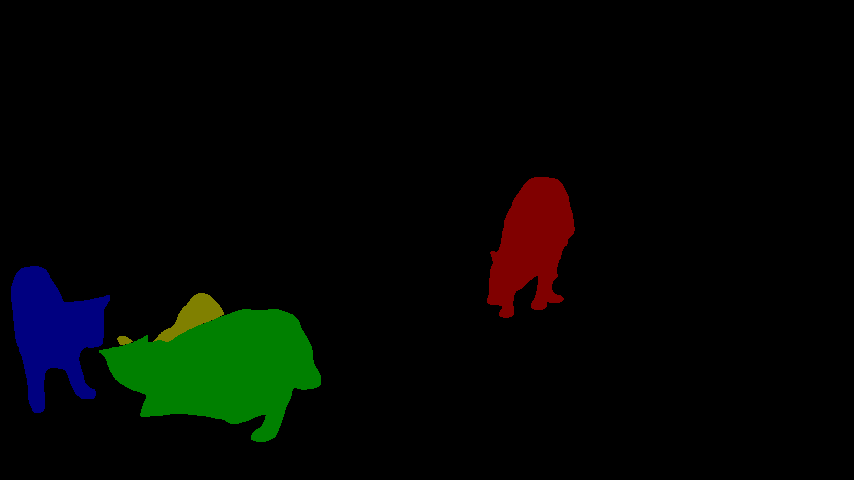

In [47]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img

img = load_img(file_path)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
img

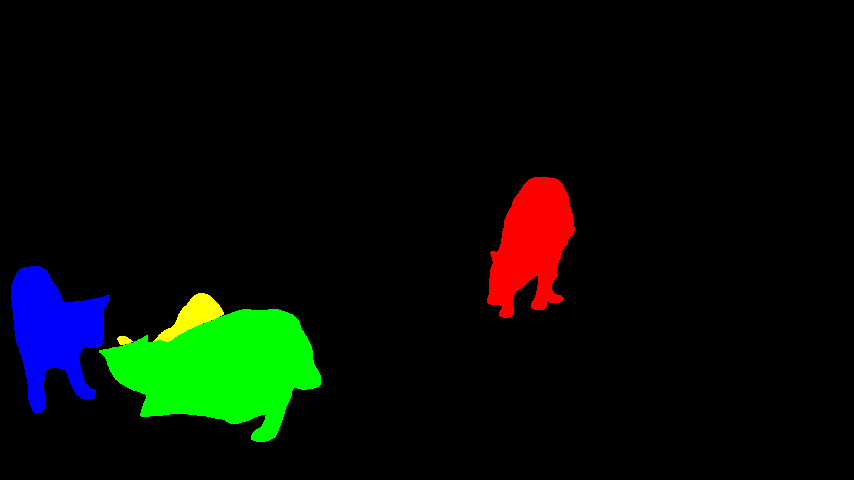

In [49]:
array_to_img(img_to_array(img))

In [50]:
save_img('test.png', img)

***keras scaling***

In [55]:
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_gen = ImageDataGenerator(rescale=1.0/255)
test_gen = ImageDataGenerator(rescale=1.0/255)

train_images = train_gen.flow(train_images, train_labels)
test_images = test_gen.flow(test_images, test_labels)

batchX, batchy = train_images.next()
print("Batch shape={}, min={}, max={}".format(batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 28, 28, 1), min=0.0, max=1.0


In [56]:
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_gen = ImageDataGenerator(featurewise_center=True)
test_gen = ImageDataGenerator(featurewise_center=True)

train_images = train_gen.flow(train_images, train_labels)
test_images = test_gen.flow(test_images, test_labels)

batchX, batchy = train_images.next()
print("Batch shape={}, min={}, max={}".format(batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 28, 28, 1), min=0.0, max=255.0


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

train_images = train_gen.flow(train_images, train_labels)
test_images = test_gen.flow(test_images, test_labels)

batchX, batchy = train_images.next()
print("Batch shape={}, min={}, max={}".format(batchX.shape, batchX.min(), batchX.max()))

train_gen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
test_gen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

train_images = train_gen.flow(train_images, train_labels)
test_images = test_gen.flow(test_images, test_labels)

batchX, batchy = train_images.next()
print("Batch shape={}, min={}, max={}".format(batchX.shape, batchX.min(), batchX.max()))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Batch shape=(32, 28, 28, 1), min=0.0, max=255.0


**Load directory keras**

In [ ]:
train_gen = ImageDataGenerator()
train_gen.flow_from_directory("/content/sample_data/train", target_size=(150, 150), class_mode="binary", batch_size=32)

**Augmentation**

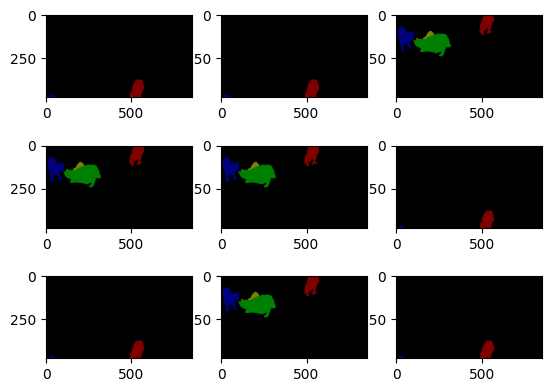

In [4]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

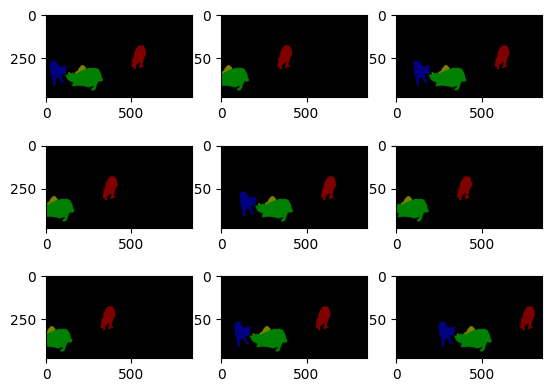

In [5]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

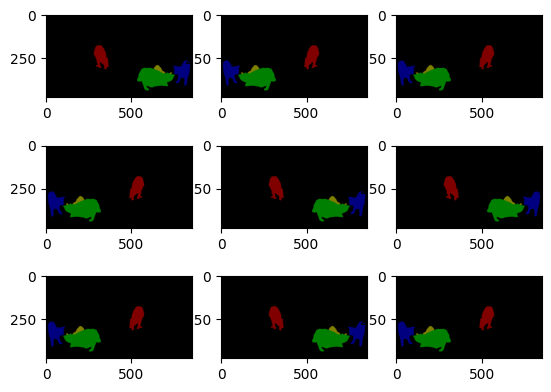

In [6]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

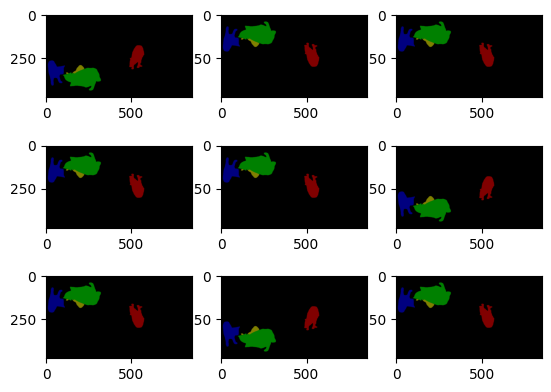

In [7]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

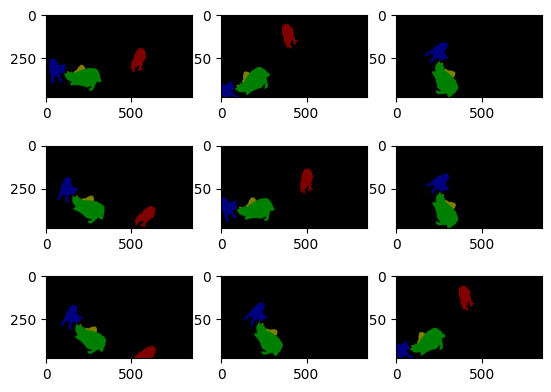

In [8]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

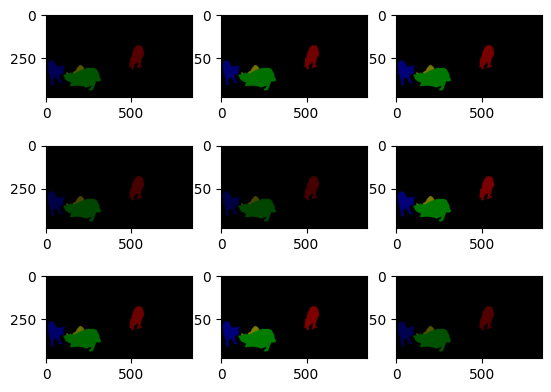

In [9]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.5, 1])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

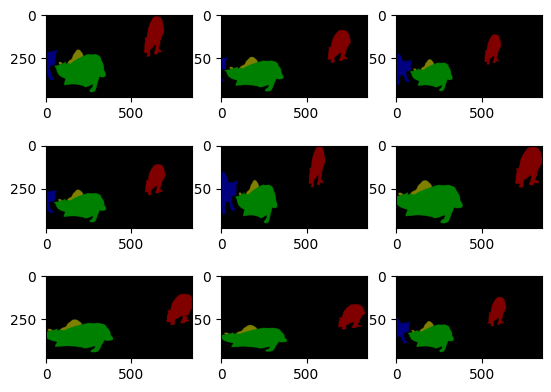

In [10]:
from numpy import expand_dims
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
# load the image
img = load_img("/content/sample_data/Imgur.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5, 1])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()